In [1]:
# packages

import numpy as np
import cobra
from cobra.io import read_sbml_model
from cobra import Reaction, Metabolite, Model

In [2]:
# model input

model = read_sbml_model("iJN678mod.xml")
model

Name,iJN678
Memory address,0x0222280cae50
Number of metabolites,796
Number of reactions,865
Number of groups,0
Objective expression,1.0*BIOMASS_Ec_SynHetero - 1.0*BIOMASS_Ec_SynHetero_reverse_5d8af
Compartments,"cytosol, periplasm, thylakoid, extracellular space"


In [5]:
from cobra.util.solver import linear_reaction_coefficients
linear_reaction_coefficients(model)

{<Reaction BIOMASS_Ec_SynHetero at 0x22235c8efd0>: 1.0}

In [7]:
# change the objective

model.objective = "EX_sql_e"
model.reactions.get_by_id("EX_sql_e").upper_bound = 1000.
linear_reaction_coefficients(model)

{<Reaction EX_sql_e at 0x22235e436d0>: 1.0}

In [8]:
model.optimize().objective_value

0.10696887686062247

In [9]:
model.metabolites.sql_c.summary()

Percent,Flux,Reaction,Definition
100.00%,0.107,SQLS,2.0 frdp_c + h_c + nadph_c --> nadp_c + 2.0 ppi_c + sql_c
Percent,Flux,Reaction,Definition
100.00%,-0.107,R_SQLt,atp_c + h2o_c + sql_c --> adp_c + pi_c + sql_e


In [10]:
# LOOPLESS FBA

from cobra.flux_analysis.loopless import add_loopless, loopless_solution
from cobra.flux_analysis import pfba

nominal = model.optimize()
loopless = loopless_solution(model)

<AxesSubplot:xlabel='loopless', ylabel='nominal'>

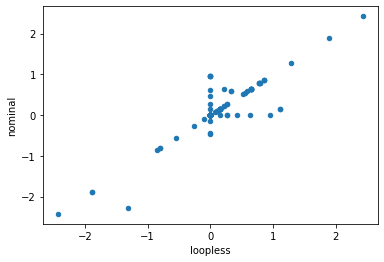

In [12]:
import pandas

df = pandas.DataFrame(dict(loopless=loopless.fluxes, nominal=nominal.fluxes))

df.plot.scatter(x='loopless', y='nominal')

In [13]:
solution = pfba(model)
solution

,fluxes,reduced_costs
EX_ac_e,0.000000e+00,264.0
34DHOXPEGOX,0.000000e+00,2.0
EX_photon_e,0.000000e+00,50.4
34HPPOR,0.000000e+00,-2.0
EX_ca2_e,0.000000e+00,2.0
...,...,...
PHETA1,0.000000e+00,2.0
ORNTAC,1.400083e-16,2.0
ABTA,1.552774e-01,-2.0
R_SQLt,1.069689e-01,-2.0


In [16]:
model

Name,iJN678
Memory address,0x0222280cae50
Number of metabolites,796
Number of reactions,865
Number of groups,0
Objective expression,1.0*EX_sql_e - 1.0*EX_sql_e_reverse_f0003
Compartments,"cytosol, periplasm, thylakoid, extracellular space"
